# Augmented Reality Applied to Images of Football Games

### Bruna Kimura e Raphael Costa

In [1]:
%reset -f
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

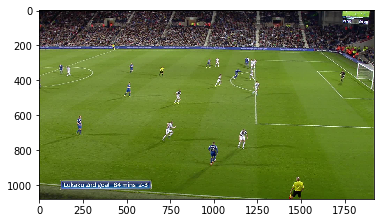

In [2]:
# Carregando a imagem de teste
img = plt.imread('imgs/img5.jpeg')
plt.imshow(img)

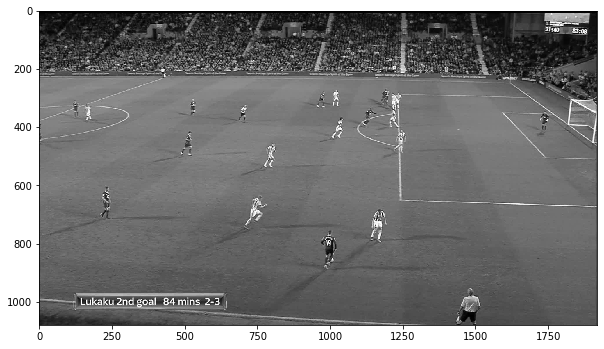

In [3]:
#deixar em escala de cinzento
img_gray = cv2.cvtColor(cv2.imread('imgs/img5.jpeg'), cv2.COLOR_BGR2GRAY) / 255.0

plt.figure(figsize=(10, 8))
plt.imshow(img_gray, cmap='gray');

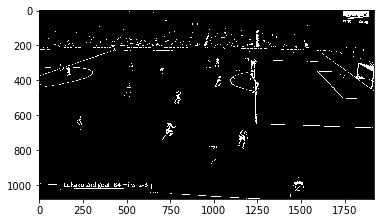

In [4]:
limiar, img_thresh = cv2.threshold(np.array(img_gray*255, dtype=np.uint8), 150, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh, cmap='gray', vmin=0, vmax=255);

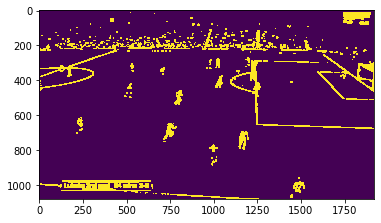

In [5]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(img_thresh,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 7)

plt.imshow(np.uint32(dilation))
plt.show()

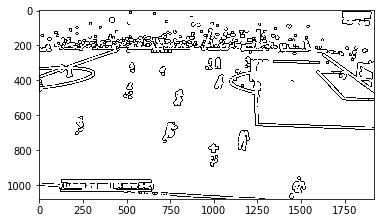

In [76]:
th3 = cv2.adaptiveThreshold(dilation,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3,'gray')

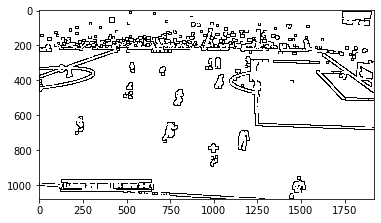

In [9]:
th3 = cv2.adaptiveThreshold(dilation,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3,'gray')

Number of Contours found = 171


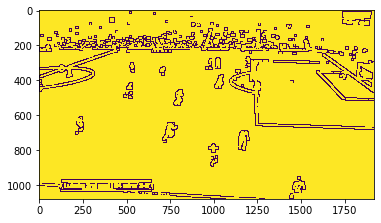

In [10]:
contours, hierarchy = cv2.findContours(th3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

plt.imshow(th3)


  
print("Number of Contours found = " + str(len(contours)))

In [11]:
pessoas = []
for i in range(0, len(contours)):
    area = cv2.contourArea(contours[i])
    if area > 100 and area < 1000:
        pessoas.append(i)
pessoas

[2,
 3,
 5,
 8,
 10,
 17,
 18,
 23,
 25,
 27,
 29,
 31,
 34,
 37,
 40,
 42,
 47,
 50,
 55,
 58,
 60,
 61,
 63,
 68,
 69,
 70,
 74,
 79,
 84,
 86,
 87,
 88,
 89,
 92,
 98,
 101,
 104,
 106,
 107,
 109,
 110,
 112,
 114,
 115,
 117,
 120,
 122,
 123,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 136,
 139,
 141,
 146,
 148,
 150,
 156,
 160,
 161,
 162,
 164,
 167]

In [15]:
# for e in pessoas:
cv2.drawContours(th3, contours, 0, (0, 255, 0))  
cv2.imshow('Contours', th3) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

2

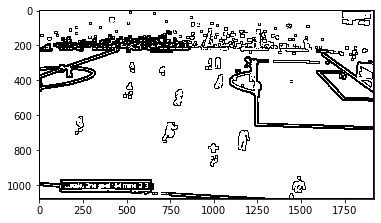

In [54]:
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(np.uint8(th3))

im_with_keypoints = cv2.drawKeypoints(th3, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
plt.imshow(im_with_keypoints)

len(keypoints)

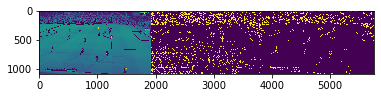

In [58]:
# Using the Canny filter to get contours
edges = cv2.Canny(img_gray, 20, 30)
# Using the Canny filter with different parameters
edges_high_thresh = cv2.Canny(img_gray, 60, 120)
# Stacking the images to print them together
# For comparison
images = np.hstack((img_gray, edges, edges_high_thresh))

# Display the resulting frame
plt.imshow(images)